In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3

In [5]:
img_dataset = tf.keras.utils.image_dataset_from_directory(
    'Dataset',
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = img_dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
68*32  # here, 32 is the batch size. Each dataset belong to 32 datas

2176

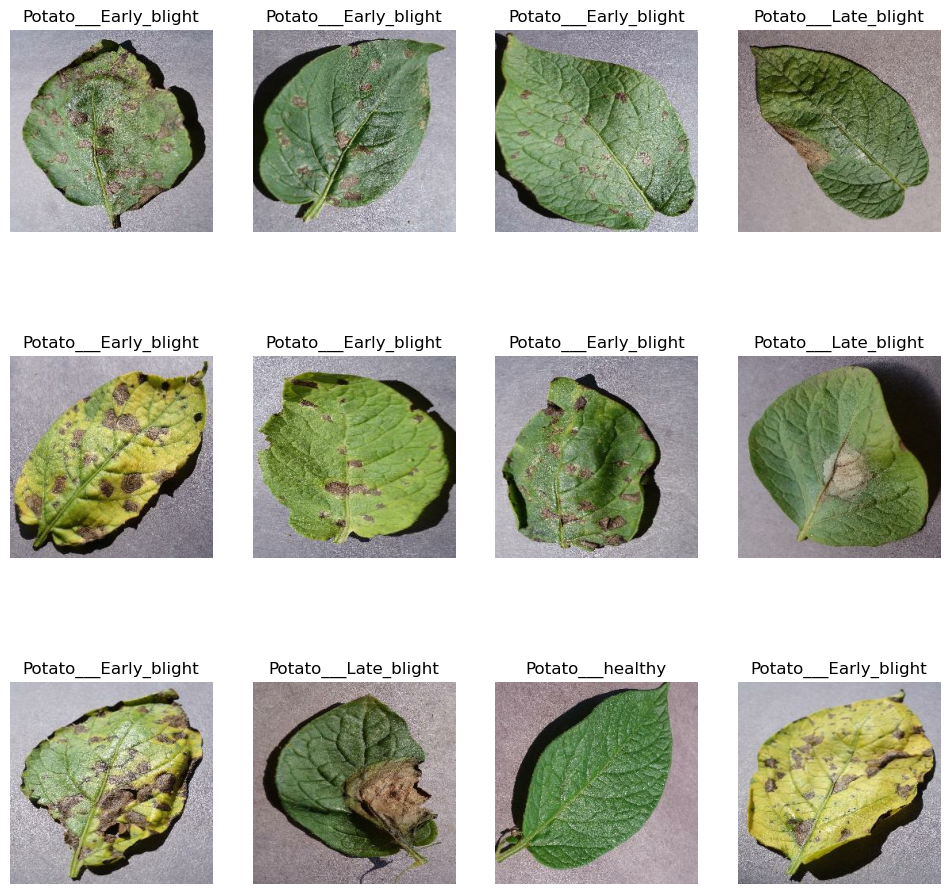

In [8]:
# lets explore more:

plt.figure(figsize=(12,12))
for image_batch,label_batch in img_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [9]:
len(img_dataset)

68

In [10]:
train_size = int(len(img_dataset) * 0.8)

train_ds = img_dataset.take(train_size)
val_test_ds = img_dataset.skip(train_size)

In [11]:
test_ds = val_test_ds.take(7)
validation_ds = val_test_ds.skip(7)

In [12]:
len(validation_ds)

7

In [13]:
len(test_ds)

7

In [14]:
len(train_ds)

54

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=20)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(img_dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25)
])

In [23]:
Input_Shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNEL)
n_classes = 3
EPOCHS = 15

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=Input_Shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape= Input_Shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=2,
    validation_data=val_ds
)

Epoch 1/15
54/54 - 94s - loss: 0.8747 - accuracy: 0.5631 - val_loss: 0.7669 - val_accuracy: 0.7188 - 94s/epoch - 2s/step
Epoch 2/15
54/54 - 99s - loss: 0.6424 - accuracy: 0.7251 - val_loss: 0.4437 - val_accuracy: 0.7917 - 99s/epoch - 2s/step
Epoch 3/15
54/54 - 94s - loss: 0.4062 - accuracy: 0.8345 - val_loss: 0.3289 - val_accuracy: 0.8750 - 94s/epoch - 2s/step
Epoch 4/15
54/54 - 91s - loss: 0.3178 - accuracy: 0.8762 - val_loss: 0.3316 - val_accuracy: 0.8698 - 91s/epoch - 2s/step
Epoch 5/15
54/54 - 95s - loss: 0.3555 - accuracy: 0.8692 - val_loss: 0.3244 - val_accuracy: 0.8646 - 95s/epoch - 2s/step
Epoch 6/15
54/54 - 90s - loss: 0.2509 - accuracy: 0.9057 - val_loss: 0.2599 - val_accuracy: 0.9062 - 90s/epoch - 2s/step
Epoch 7/15
54/54 - 85s - loss: 0.2102 - accuracy: 0.9236 - val_loss: 0.2535 - val_accuracy: 0.9010 - 85s/epoch - 2s/step
Epoch 8/15
54/54 - 78s - loss: 0.2965 - accuracy: 0.8843 - val_loss: 0.1980 - val_accuracy: 0.9323 - 78s/epoch - 1s/step
Epoch 9/15
54/54 - 80s - loss: 0

In [27]:
history

In [28]:
history.params

{'verbose': 2, 'epochs': 15, 'steps': 54}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.5630787014961243,
 0.7251157164573669,
 0.8344907164573669,
 0.8761574029922485,
 0.8692129850387573,
 0.9056712985038757,
 0.9236111044883728,
 0.8842592835426331,
 0.9114583134651184,
 0.9045138955116272,
 0.9508101940155029,
 0.9502314925193787,
 0.9629629850387573,
 0.96875,
 0.9461805820465088]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

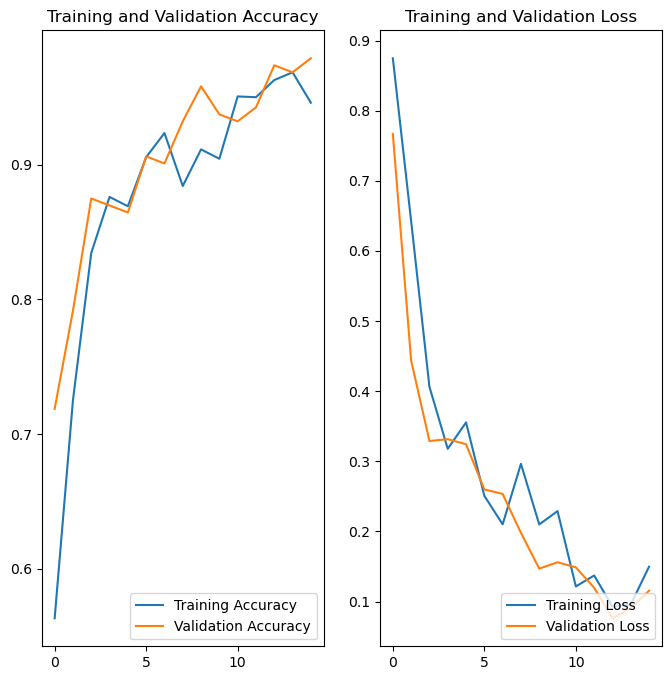

In [32]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss , label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [33]:
import numpy as np
np.argmax([0.13209654, 0.86682385, 0.00107962])

1

first image to predict:
first image actual label:  Potato___healthy
1/1 [==============================] - 1s 608ms/step
Potato___healthy


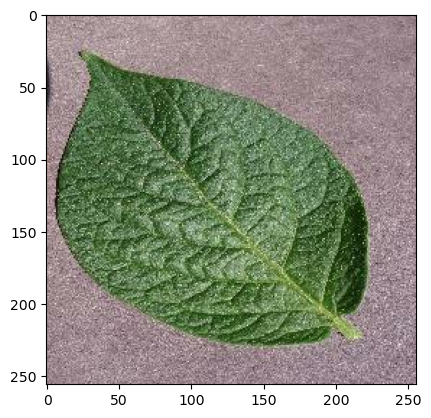

In [34]:
for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image to predict:')
    plt.imshow(first_image)
    print('first image actual label: ', class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 35ms/step


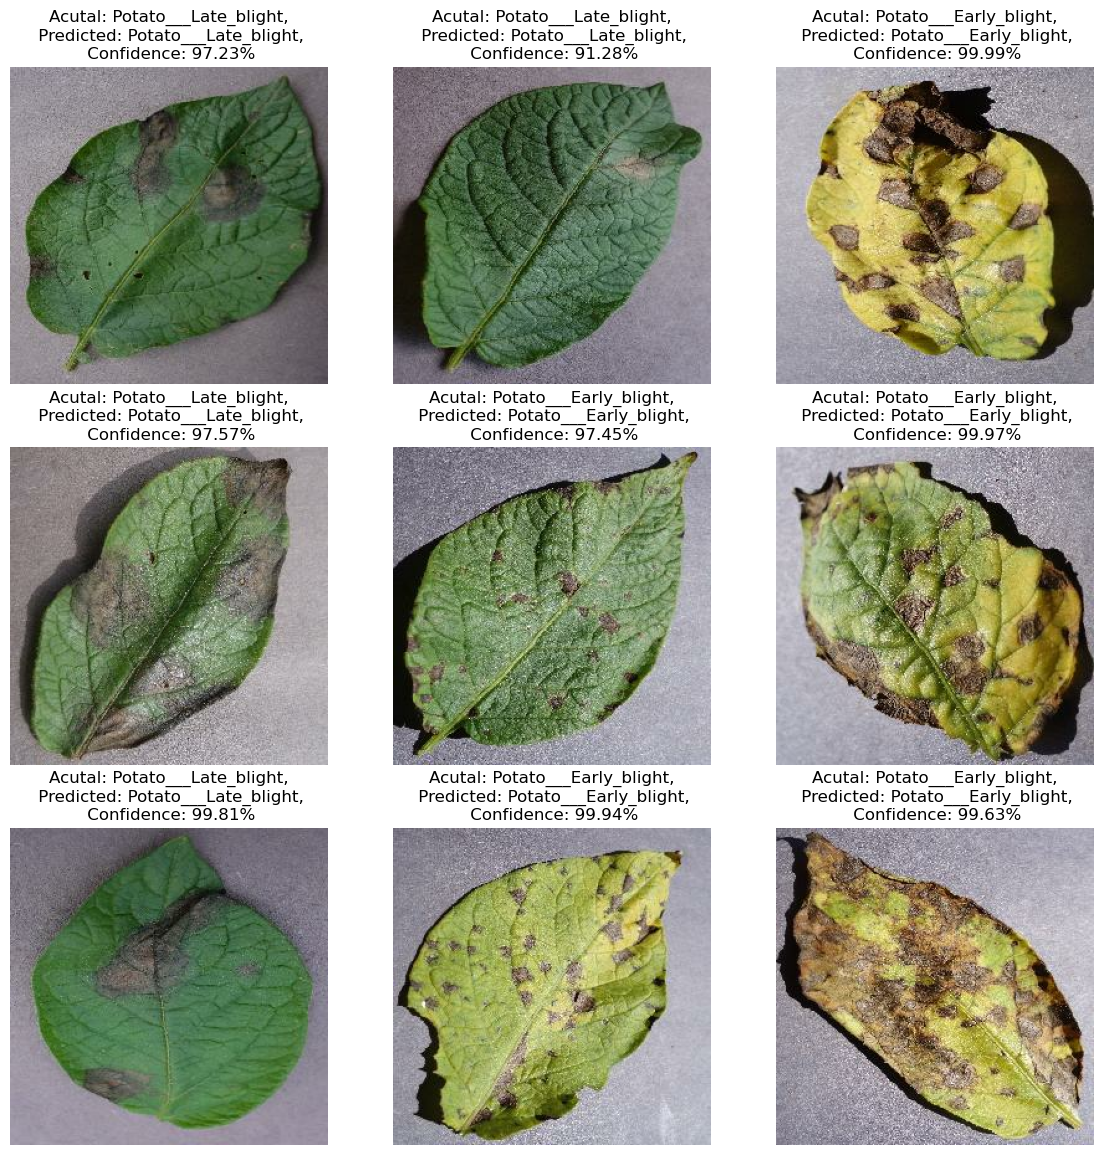

In [36]:
plt.figure(figsize=(14,14))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Acutal: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis('off')
  

In [38]:
model_version = 0.02
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/0.02\assets


INFO:tensorflow:Assets written to: ../models/0.02\assets
